DOWLOADING LIBRERIES

In [1]:
#downloading library
library(tidyverse)
library(showtext)
showtext_auto()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: sysfonts

Loading required package: showtextdb



READ DATASET

In [2]:
#lf is dataset name
lf <- read_csv('../input/layoffs-2022/layoffs.csv')
glimpse(lf)


Rows: 2473 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): company, location, industry, stage, country
dbl  (3): total_laid_off, percentage_laid_off, funds_raised
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 2,473
Columns: 9
$ company             <chr> "Pear Therapeutics", "ZestMoney", "Absolute Softwa…
$ location            <chr> "Boston", "Bengaluru", "Vancouver", "Berlin", "Ben…
$ industry            <chr> "Healthcare", "Finance", "Security", "Transportati…
$ total_laid_off      <dbl> 170, 100, 40, 16, 300, 99, 600, 15, NA, 1000, 170,…
$ percentage_laid_off <dbl> 0.92, 0.20, 0.05, 1.00, 0.30, 0.13, 0.40, 0.20, NA…
$ date                <date> 2023-04-07, 2023-04-07, 2023-04-06, 2023-04-06, 2…
$ stage               <chr> "Post-IPO", "Series C", "Post-IPO", "Seed", "Unkno…
$ country             <chr> "United States", "India", "Canada", "Germany", "In…
$ funds_raised        <dbl> 409, 120, NA, NA, 382, 311, NA, 37, NA, NA, 2300, …


VIEW DATASET

In [3]:
View(lf)

company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>,<chr>,<chr>,<dbl>
Pear Therapeutics,Boston,Healthcare,170,0.92,2023-04-07,Post-IPO,United States,409
ZestMoney,Bengaluru,Finance,100,0.20,2023-04-07,Series C,India,120
Absolute Software,Vancouver,Security,40,0.05,2023-04-06,Post-IPO,Canada,NA
Avocargo,Berlin,Transportation,16,1.00,2023-04-06,Seed,Germany,NA
Dunzo,Bengaluru,Food,300,0.30,2023-04-05,Unknown,India,382
Amplitude,SF Bay Area,Data,99,0.13,2023-04-05,Post-IPO,United States,311
1K Kirana,Gurugram,Retail,600,0.40,2023-04-04,Series B,India,NA
Boost,New York City,Finance,15,0.20,2023-04-04,Series B,United States,37
Cin7,Auckland,Retail,NA,NA,2023-04-04,Private Equity,New Zealand,NA


cleaning DATASET

In [4]:
sapply(lf,function(x)sum(is.na(x)))

company            location            industry      total_laid_off 
                  0                   0                   2                 777 
percentage_laid_off                date               stage             country 
                830                   1                   6                   0 
       funds_raised 
                235

In [5]:
lf <- lf %>% drop_na()
sapply(lf,function(x)sum(is.na(x)))


company            location            industry      total_laid_off 
                  0                   0                   0                   0 
percentage_laid_off                date               stage             country 
                  0                   0                   0                   0 
       funds_raised 
                  0

CHANGING CHARACTER STRING INTO FACTOR

In [6]:
lf <- lf %>% mutate_if(is.character,as.factor)
glimpse(lf)

Rows: 1,134
Columns: 9
$ company             <fct> Pear Therapeutics, ZestMoney, Dunzo, Amplitude, Bo…
$ location            <fct> Boston, Bengaluru, Bengaluru, SF Bay Area, New Yor…
$ industry            <fct> Healthcare, Finance, Food, Data, Finance, Other, R…
$ total_laid_off      <dbl> 170, 100, 300, 99, 15, 170, 15, 89, 200, 100, 19, …
$ percentage_laid_off <dbl> 0.92, 0.20, 0.30, 0.13, 0.20, 0.23, 0.12, 0.45, 0.…
$ date                <date> 2023-04-07, 2023-04-07, 2023-04-05, 2023-04-05, 2…
$ stage               <fct> Post-IPO, Series C, Unknown, Post-IPO, Series B, P…
$ country             <fct> United States, India, India, United States, United…
$ funds_raised        <dbl> 409, 120, 382, 311, 37, 2300, 42, 130, 208, 50, 24…


In [7]:
lf$yrs <- strftime(lf$date,'%Y') %>% as.factor()
lf$mnt <- strftime(lf$date,'%m') %>% as.factor()

In [8]:
summary(lf)

              company              location             industry  
 Blend            :   4   SF Bay Area  :315   Finance       :161  
 Loft             :   4   New York City:128   Retail        : 95  
 Pear Therapeutics:   4   Boston       : 50   Healthcare    : 80  
 Swiggy           :   4   Bengaluru    : 45   Transportation: 76  
 Uber             :   4   Los Angeles  : 40   Marketing     : 75  
 Bounce           :   3   Seattle      : 40   Food          : 66  
 (Other)          :1111   (Other)      :516   (Other)       :581  
 total_laid_off    percentage_laid_off      date                 stage    
 Min.   :    3.0   Min.   :0.0000      Min.   :2020-03-12   Post-IPO:226  
 1st Qu.:   38.0   1st Qu.:0.1000      1st Qu.:2020-06-03   Series B:164  
 Median :   80.0   Median :0.1600      Median :2022-07-14   Series C:154  
 Mean   :  262.6   Mean   :0.2227      Mean   :2022-01-14   Unknown :140  
 3rd Qu.:  192.5   3rd Qu.:0.2800      3rd Qu.:2022-11-30   Series D:132  
 Max.   :12000

In [9]:
fig <- function(width,height){
    options(repr.plot.width=width,repr.plot.height=height)
}
fig(20,10)

`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.


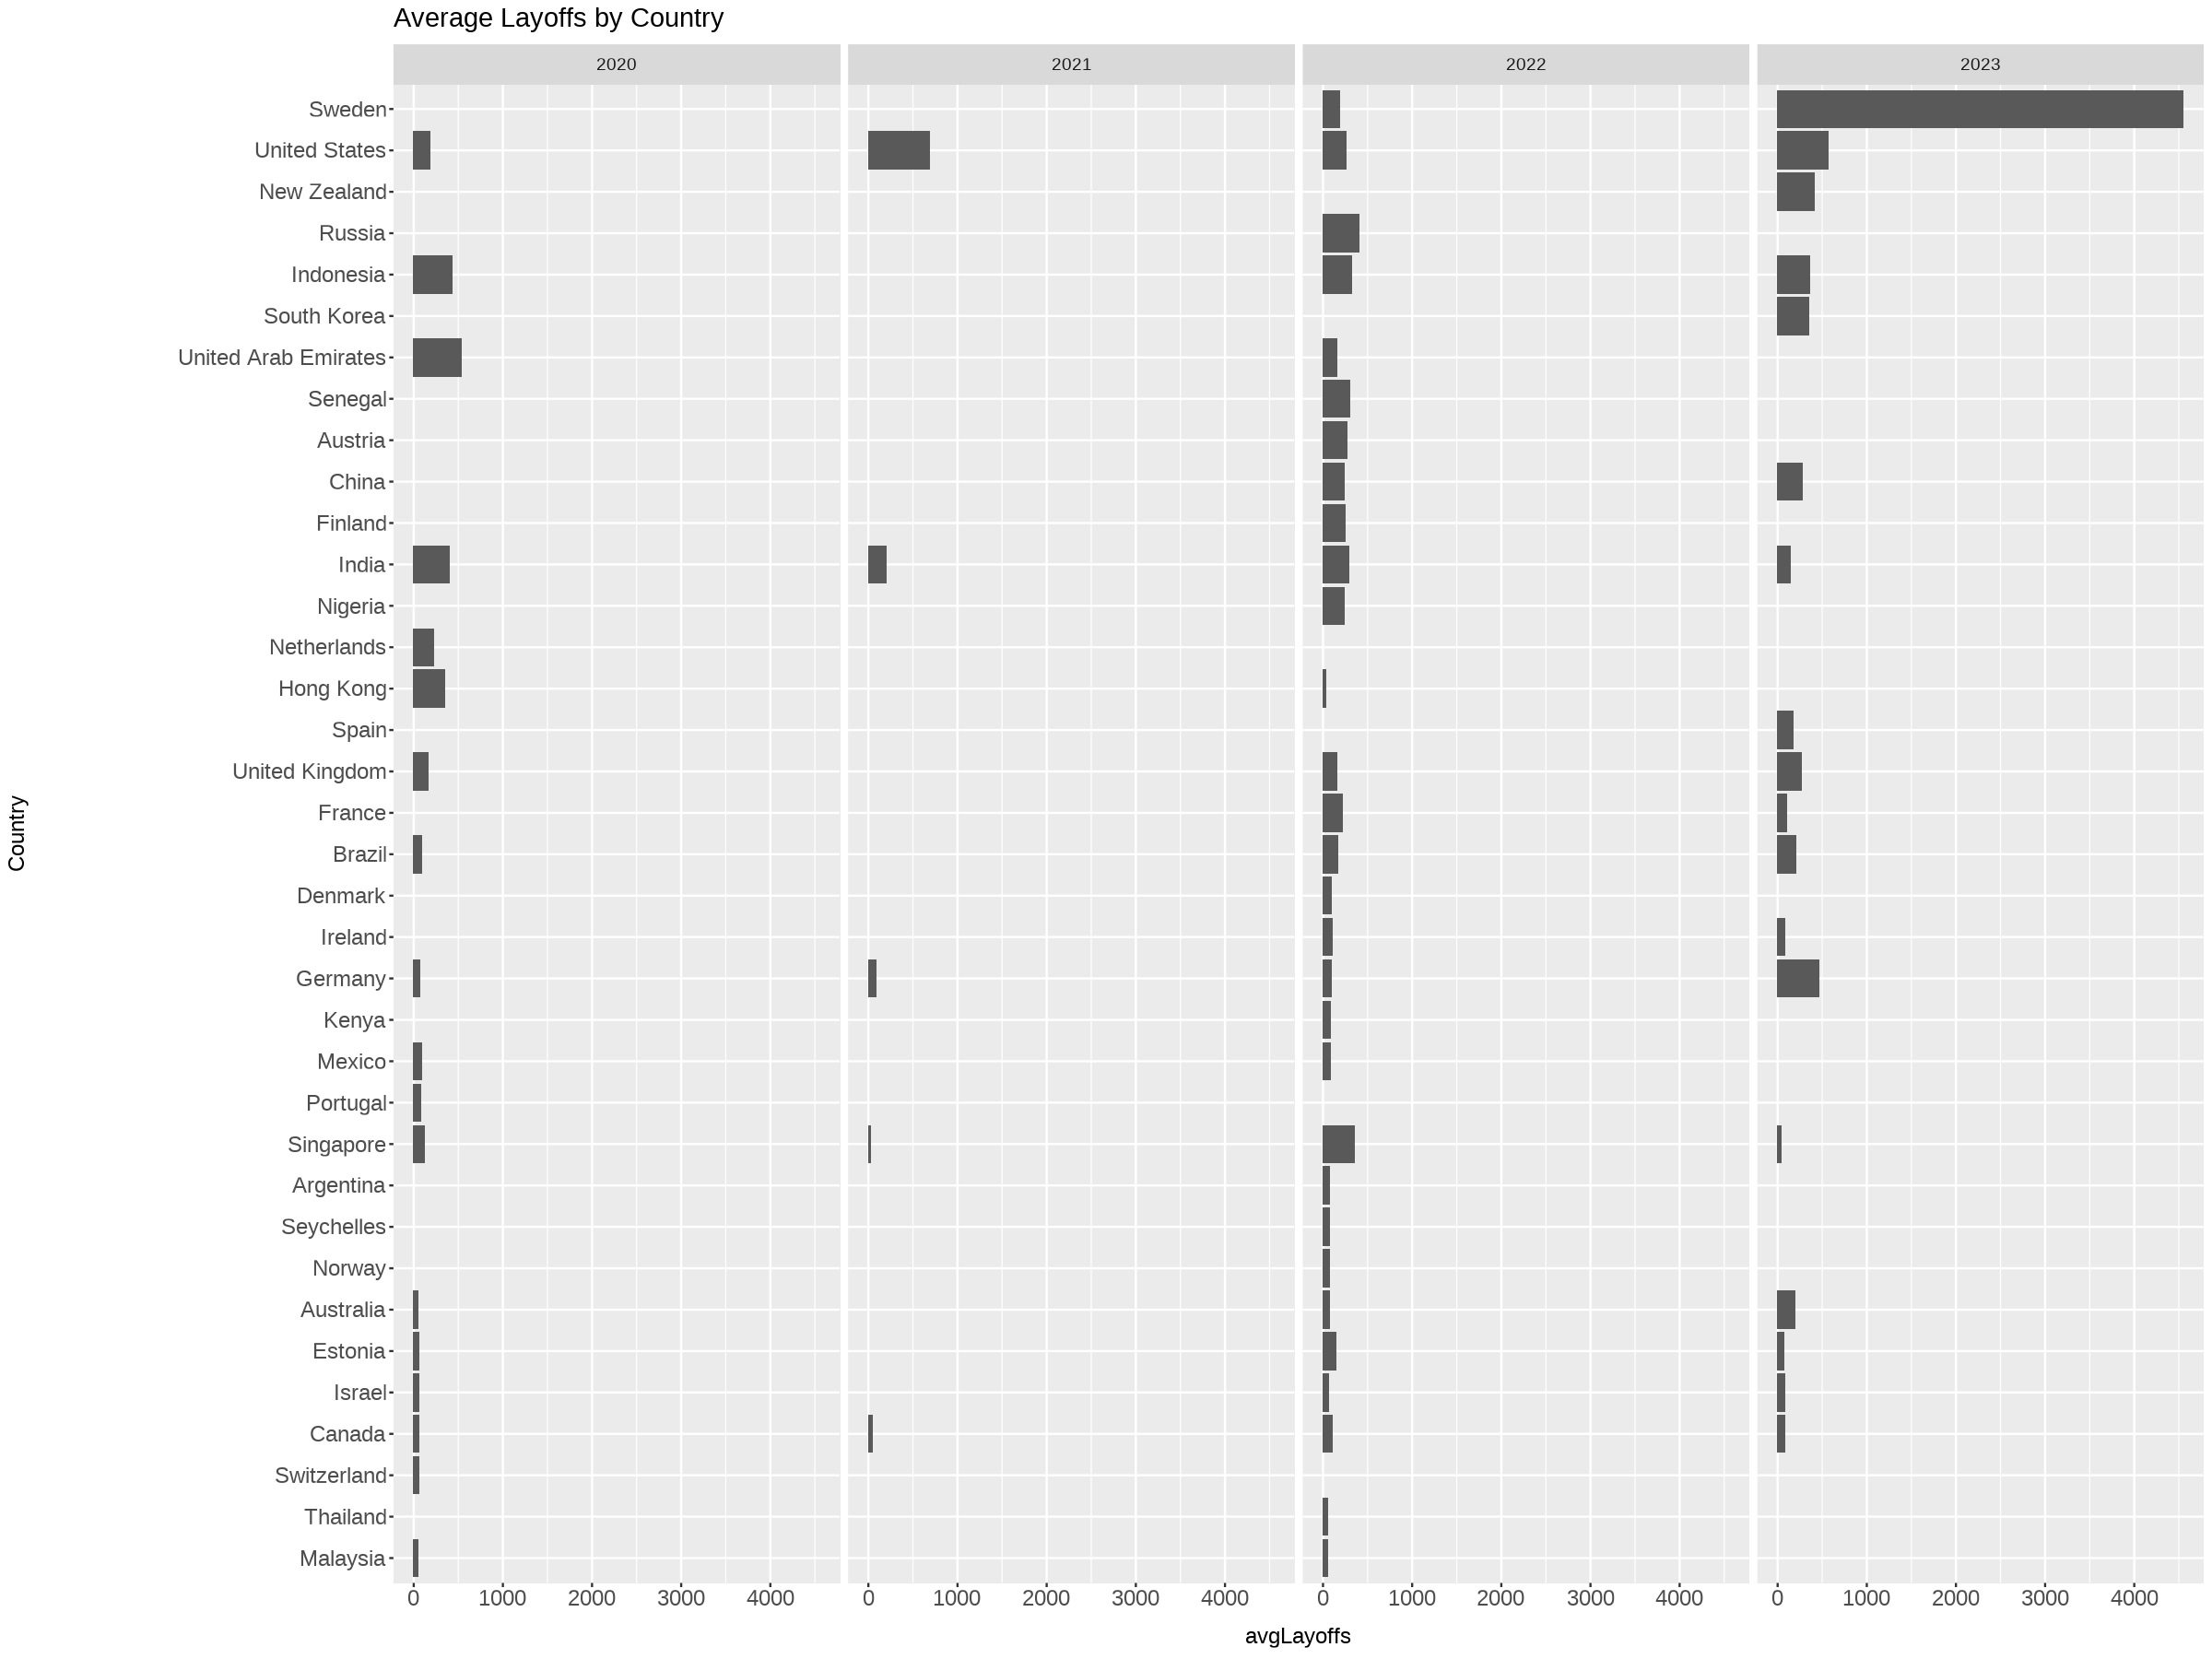

In [10]:

fig(20,15)
lf %>% group_by(country,yrs) %>% summarize('avgLayoffs'=round(mean(total_laid_off),0)) %>%
ggplot(aes(fct_reorder(country,avgLayoffs),avgLayoffs))+geom_col()+coord_flip()+
labs(title='Average Layoffs by Country',x='Country',y='avgLayoffs')+
theme(text=element_text(size=18),axis.text=element_text(size=18))+
facet_grid(.~yrs,scales='free_y',space='free_y') 
# In 2022 The most layoffs occurred in Turkey,Indonesia,Singapore

In [11]:
fig <- function(width,height){
    options(repr.plot.width=width,repr.plot.height=height)
}
fig(20,10)

Plot average layoffs by country
Spot Finding: In 2022 the most layoffs occurred in Turkey,Indonesia,Singapore

`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.


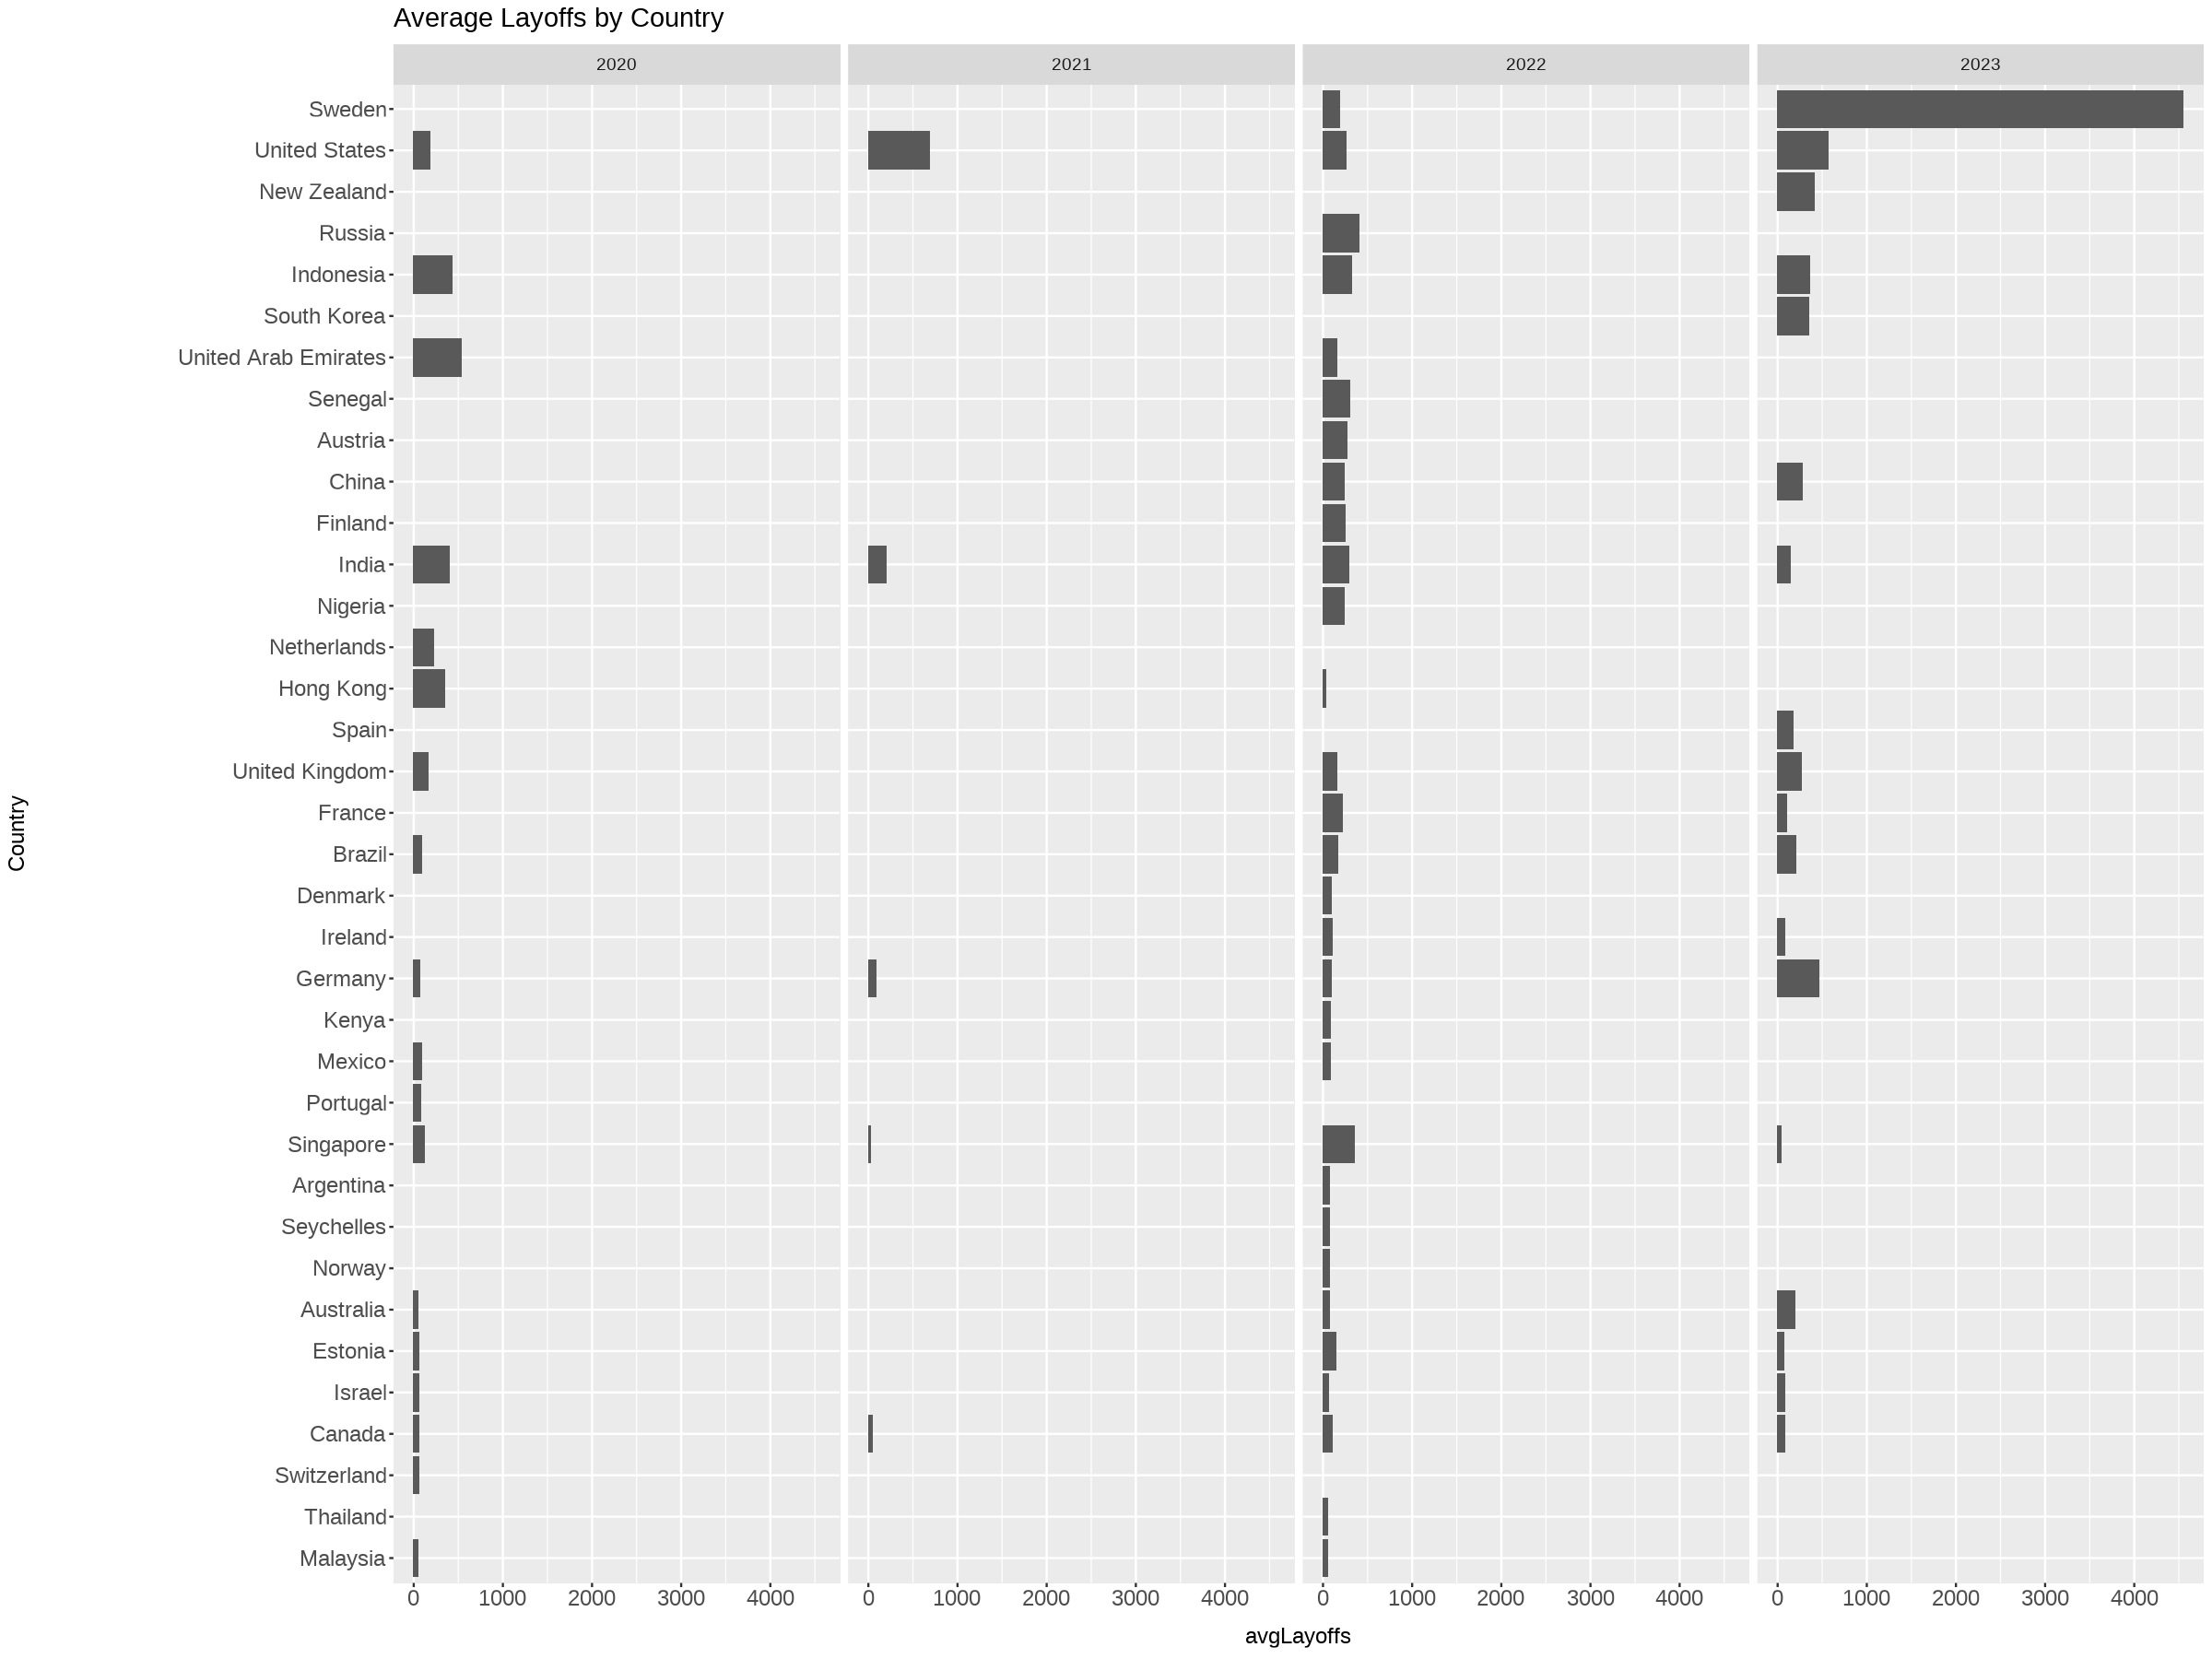

In [12]:
fig(20,15)
lf %>% group_by(country,yrs) %>% summarize('avgLayoffs'=round(mean(total_laid_off),0)) %>%
ggplot(aes(fct_reorder(country,avgLayoffs),avgLayoffs))+geom_col()+coord_flip()+
labs(title='Average Layoffs by Country',x='Country',y='avgLayoffs')+
theme(text=element_text(size=18),axis.text=element_text(size=18))+
facet_grid(.~yrs,scales='free_y',space='free_y') 
# In 2022 The most layoffs occurred in Turkey,Indonesia,Singapore


`summarise()` has grouped output by 'industry'. You can override using the
`.groups` argument.


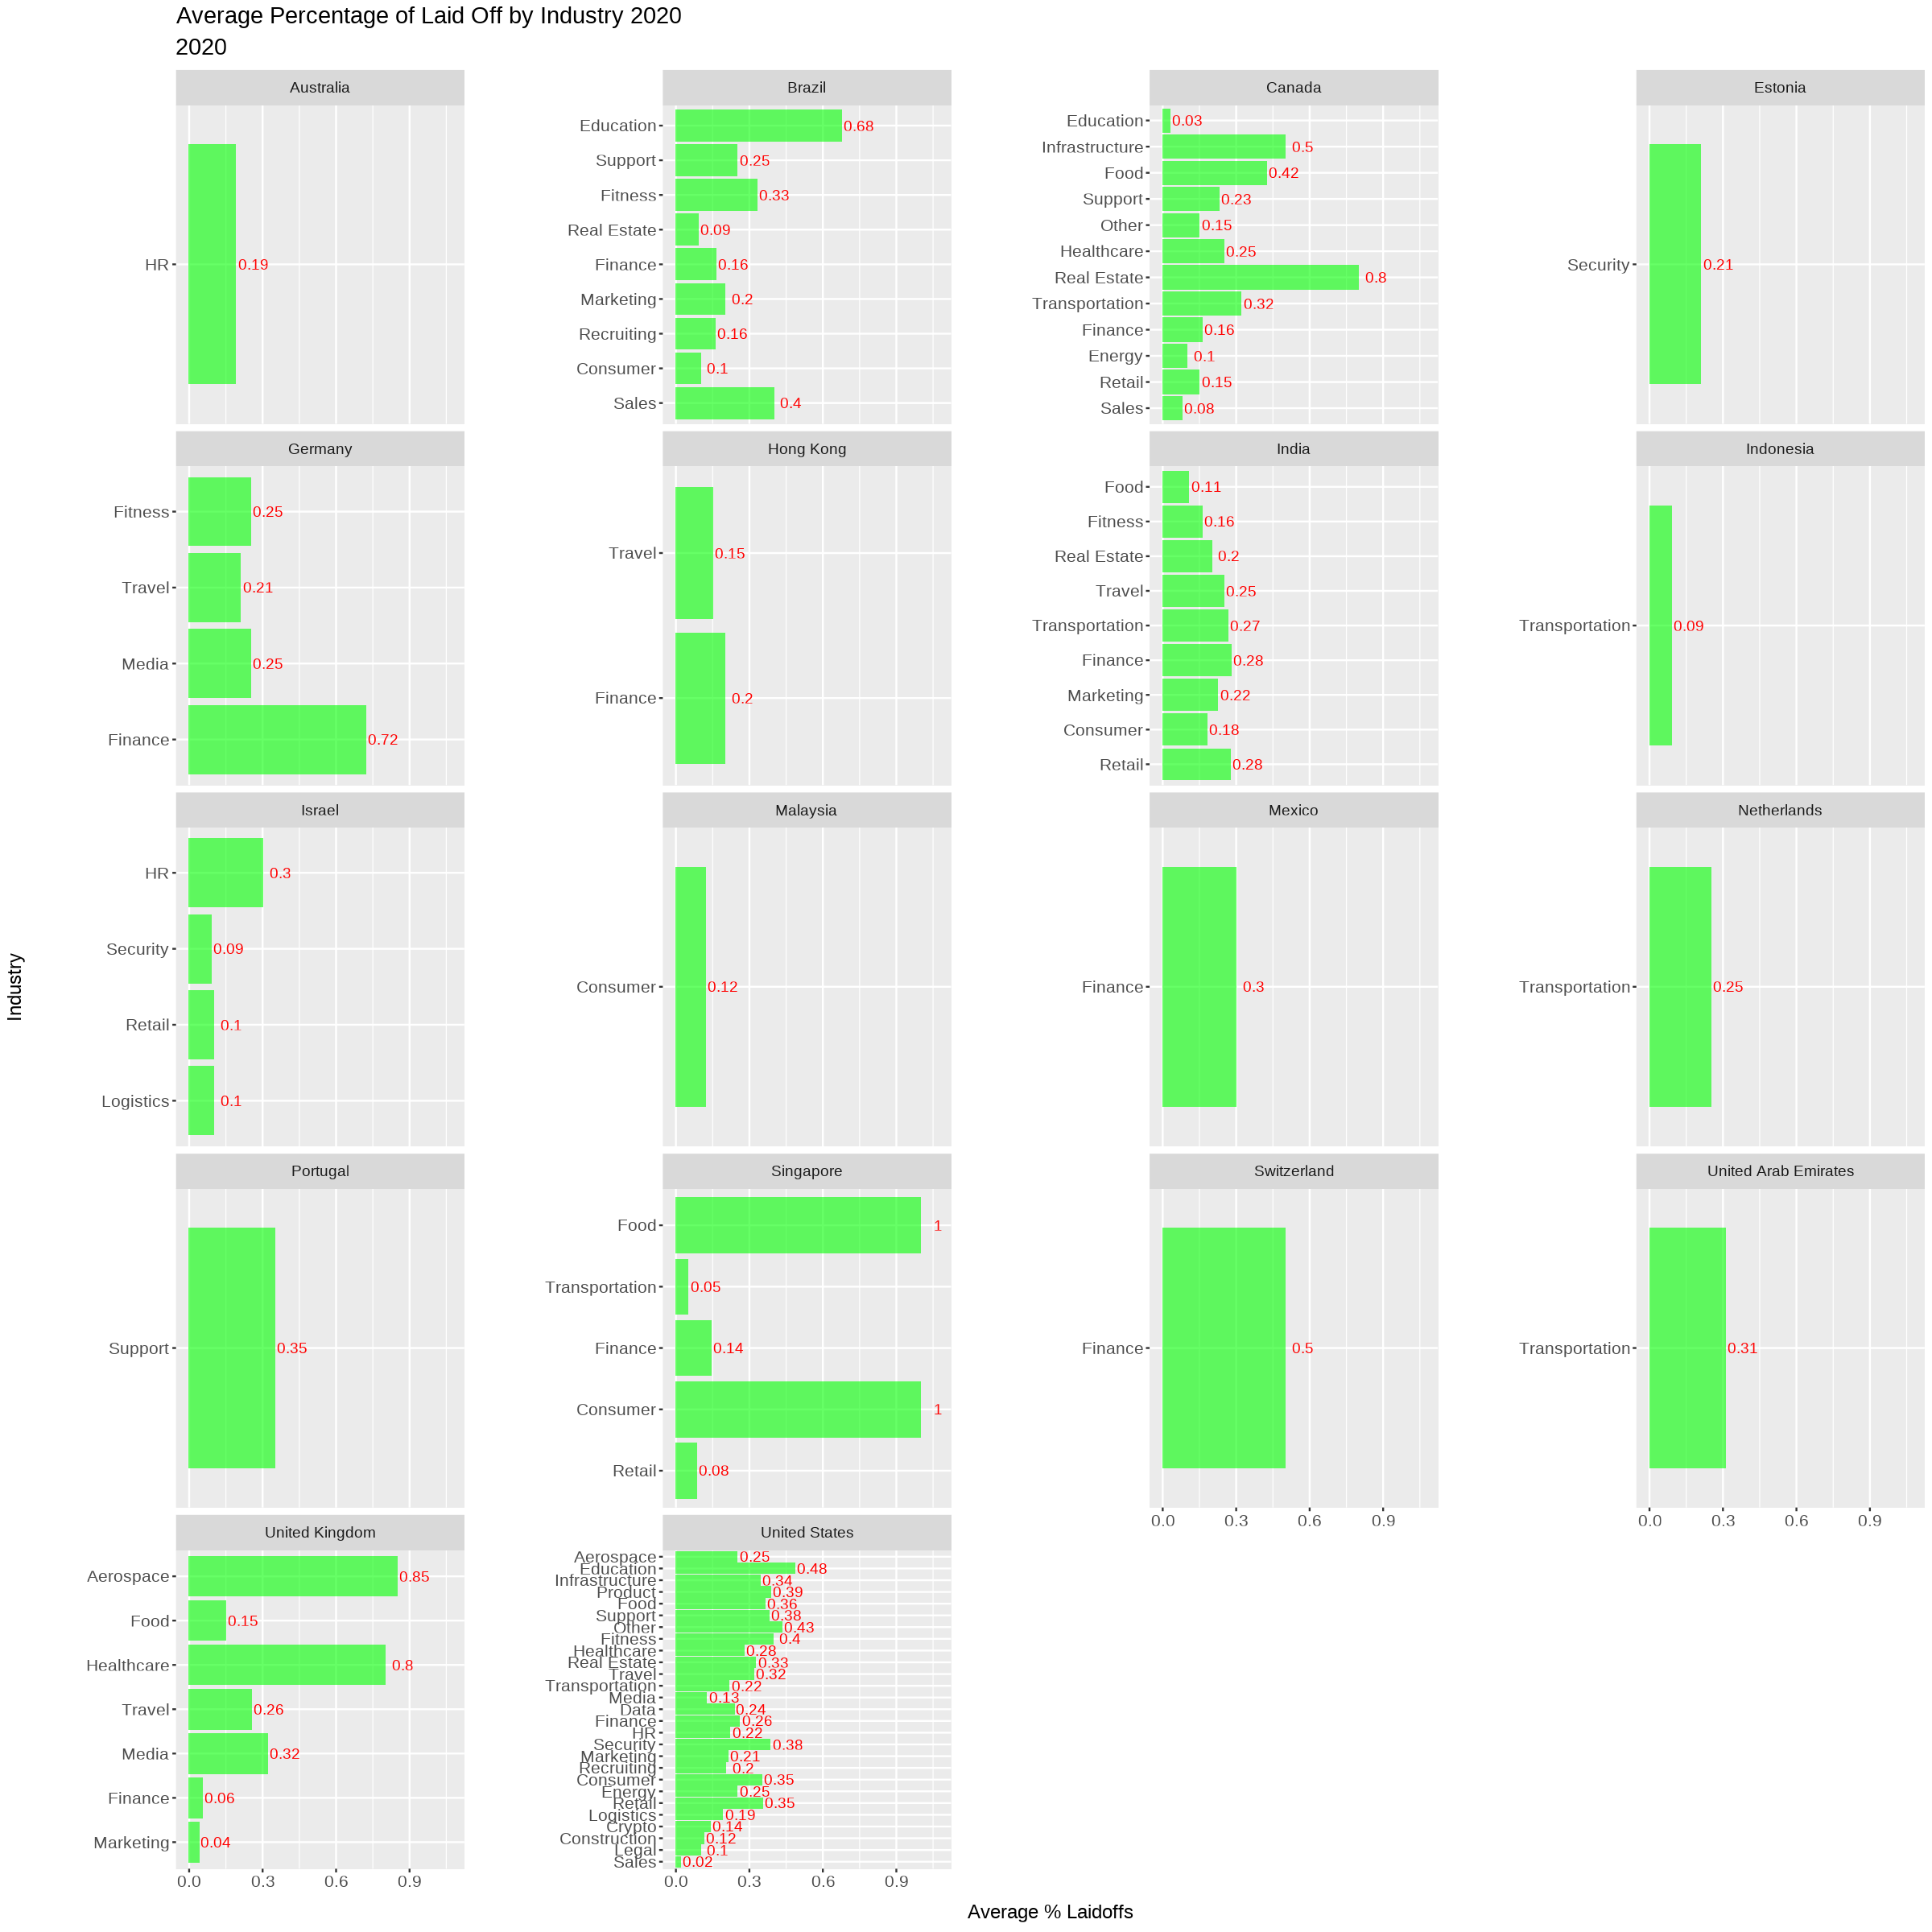

In [13]:
fig(20,20)
N <- '2020'
lf %>% subset(yrs==N)%>%group_by(industry,country) %>% summarize('avgPercentageLaidOff'=mean(percentage_laid_off)) %>%
ggplot(aes(fct_reorder(industry,avgPercentageLaidOff),avgPercentageLaidOff))+geom_col(alpha=.6,fill='green')+
theme(text=element_text(size=18),axis.text=element_text(size=16))+
coord_flip()+labs(title=paste0('Average Percentage of Laid Off by Industry ',N,'\n',N,''),x='Industry',y='Average % Laidoffs')+
geom_text(aes(y=avgPercentageLaidOff+7e-2,label=round(avgPercentageLaidOff,2)),color='red',size=5)+
facet_wrap(.~country,ncol=4,scales='free_y')  